# Building a YOLOv3 Object Detector with Darknet in the Cloud! (GPU ENABLED)
Here I used a pre-trained YOLO V3 model which could detect over 80 classes but we are using it to detect my custom objects i.e Fire. This project can be further expanded for fire detection and automatic alerting system and it is under development to do so.!

# Step 1: Enabling GPU within your notebook
You need to enable GPU acceleration within your Colab notebook so that your YOLOv3 system will be able to process detections over 100 faster than CPU.

### Steps:
## <i>Colab -> Edit -> Notebook Settings -> GPU -> Save</i>


# Step 2: Cloning and Building Darknet
The following cells will clone darknet from AlexeyAB's famous repository, adjust the Makefile to enable OPENCV and GPU for darknet and then build darknet.

Do not worry about any warnings when you run the '!make' cell!

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 13033, done.
remote: Total 13033 (delta 0), reused 0 (delta 0), pack-reused 13033
Receiving objects: 100% (13033/13033), 11.76 MiB | 9.73 MiB/s, done.
Resolving deltas: 100% (8908/8908), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [0]:
# make darknet (build)
# Do not worry about any warnings 
!make

# Step 3: Download pretrained YOLOv3 weights
YOLOv3 has been trained already on the coco dataset which has 80 classes that it can predict. We will grab these pretrained weights so that we can run YOLOv3 on these pretrained classes and get detections.<br>
For our custom object detection, we train our custom model on top of this pretrained weights.

In [5]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-04-06 03:35:19--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  1020KB/s    in 3m 55s  

2020-04-06 03:39:15 (1.01 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [0]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

# Step 4: Run Detections with Darknet and YOLOv3!
Darknet is now built and ready to run detections using YOLOv3 in the cloud! You can find out which sorts of classes the pretrained YOLOv3 weights can detect by clicking here. [COCO CLASSES](http://cocodataset.org/#explore)

The object detector can be run using the following command
```bash
!./darknet detect <path to config> <path to weights> <path to image>
```
Darknet comes with a few images already installed in the darknet/data/ folder.

**Note:** After running detections OpenCV can't open the image instantly in the cloud so we must run: 
```bash
imShow('predictions.jpg')
```
This will output the image with the detections shown. The most recent detections are always saved to 'predictions.jpg'

Try out the examples below for yourself!

In [7]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 10000 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 750, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64 

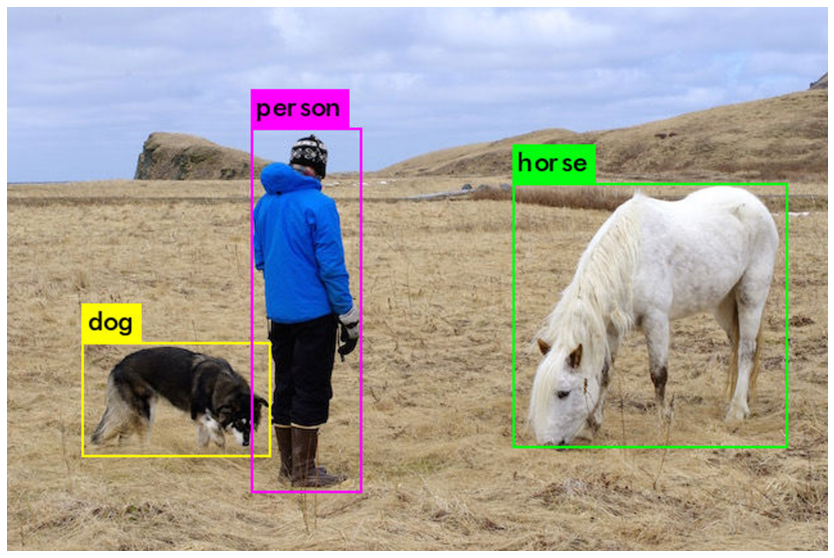

In [8]:
# show image using our helper function
imShow('predictions.jpg')

 CUDA-version: 10000 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 600, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64 

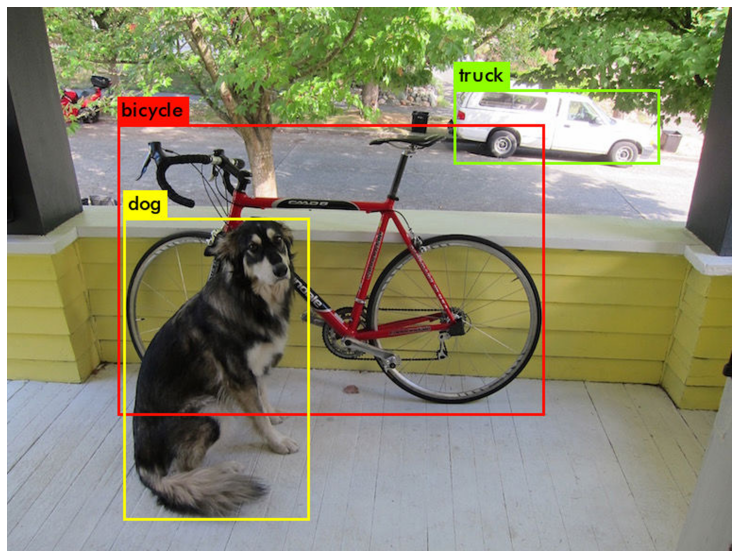

In [0]:
# look we can run another detection!
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
imShow('predictions.jpg')

In [0]:

# This stops 'Run all' at this cell by causing an error
assert False

# Step 5: Uploading Local or Google Drive Files to Use
You may want to run detections on more than just the images within the darknet/data/ folder. This step will show you how to upload local or Google Drive files to the cloud VM and run detections on them!

### Method 1: Local Files
To upload local files just use our helper function by running 'upload()' as seen below. Click **Choose Files** and select the image from your local machine that you want to upload to the cloud VM.

If this function doesn't work for you then click the **Upload** button in the File Explorer on the left side of your notebook.

The image should save to your root directory so that you can access it from your darknet command by running.
```
!./darknet detect cfg/yolov3.cfg yolov3.weights ../<your image name>
```

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Method 2: Google Drive
Images can also be uploaded from your Google Drive and easily have detections run on them.

You will want to run the below cell to mount your google drive into the cloud VM so that you can access its contents. It is that easy!

**NOTE:** We will be creating a symbolic link between '/content/gdrive/My\ Drive/' and '/mydrive.

The reason for this is that sometime having the space in 'My Drive' folder path can cause issues when running certain commands. This symbolic link will stop this from happening!

Now you can run YOLOv3 with images from Google Drive using the darknet command:
```
# Syntax
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/<path to image>
```
I recommend saving images within a folder called 'images' at the root level of your Google Drive.

In [29]:
%cd /content/darknet/
!ls

/content/darknet
3rdparty      cmake		      image_yolov2.sh	     predictions.jpg
appveyor.yml  CMakeLists.txt	      image_yolov3.sh	     README.md
backup	      darknet		      include		     results
bad.list      DarknetConfig.cmake.in  json_mjpeg_streams.sh  scripts
build	      darknet.py	      LICENSE		     src
build.ps1     darknet_video.py	      Makefile		     video_v2.sh
build.sh      data		      net_cam_v3.sh	     video_yolov3.sh
cfg	      fre1.jpg		      obj		     yolov3.weights


 CUDA-version: 10000 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 750, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64 

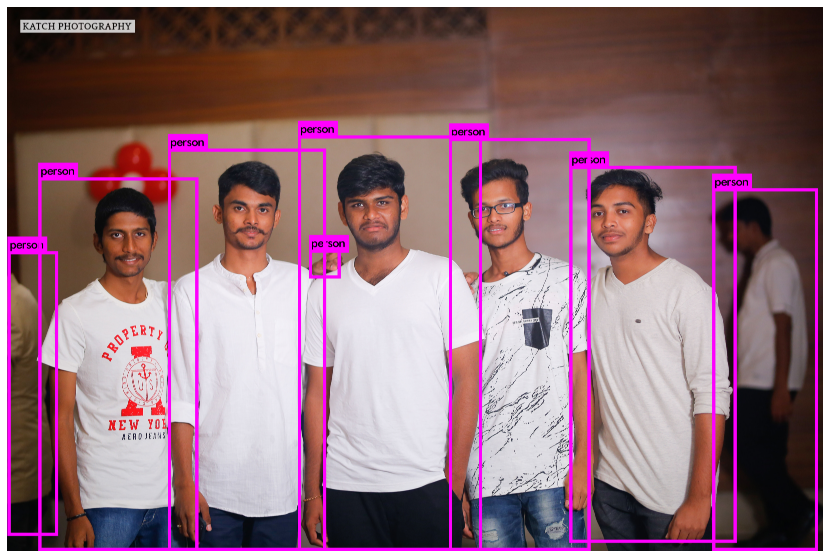

In [33]:
# make sure you are in the darknet folder to run the detections command!
# %cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights fre1.jpg
imShow('predictions.jpg')

In [35]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': Operation not supported
 04.mp4
 abc.jpg
 ANN.ipynb
'Auto Call Recorder'
'Basic Medical assistance chat-bot-converted (1).pdf'
'Basic Medical assistance chat-bot-converted (2).pdf'
'Basic Medical assistance chat-bot-converted.pdf'
'Basic Medical assistance chat-bot.pptx'
 Brochure.gdoc
 CEH
'CEW lab PPT'
'C++ lab Programs(8 to 15).doc'
 client.exe
'Colab Notebooks'
'Copy of vox-adv-cpk.pth.tar'
 Corona-Pneumonia-Healthy
'CSI Workshop Registrations 2019.gsheet'
'Cyber Security permission.docx'
'CYBER SECURITY WORKSHOP ATTENDANCE.gsheet'
 Deep_Fake_first_order
 detection1.jpg
 EmotionDataset.csv
'Expenditure for CSI Annual Fest 2019-20..gsheet'
 fest.docx
 first-order-motion-model
 freshers.jpg
 haK
'hostel letter cyber security.docx'
 hotstar_cookies.txt
'How to get started with Drive.pdf'
 IMG-20180828-WA0011.jpg
 IMG-20191103-WA0018.jpg
 IMG-20191103-WA0019.jpg
 IMG-20191103-WA0023.jpg
 IMG-20191103-WA0024.jpg
 IMG-20191103-WA002

In [13]:
%cd ..

/


In [48]:
!mv /mydrive/freshers.jpg /darknet

mv: cannot stat '/mydrive/freshers.jpg': No such file or directory


 CUDA-version: 10000 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 750, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64 

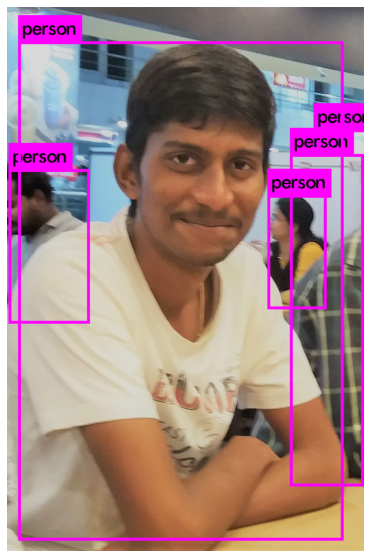

In [50]:
# run darknet command with google drive image (my image path is /images/plane.jpg)
# %cd darknet

!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/out.jpg
imShow('predictions.jpg')

### Download Files to Local Machine or Google Drive from Cloud VM
You can also easily download images from your cloud VM to save to your local machine or Google Drive. 

#### Method 1: Local Machine

You can do it easily by using our helper function 'download()' or by right clicking the image in the File Explorer on the left side of your notebook and hitting **Download**. Files will be saved to your *Downloads* folder.

This is useful if you want to download the **'predictions.jpg'** images that the object detector outputs. 

#### Method 2: Google Drive
A simple copy command can copy over any file to your Google Drive as it is already mounted. (you must run the mount command above if you have not already)

```
!cp <file to download> <destination to save file>
```
See example of each below!

In [0]:
# LOCAL MACHINE DOWNLOAD
# if you get an error first run then run it again and it should work
download('predictions.jpg')

In [0]:
# GOOGLE DRIVE DOWNLOAD
# note that I can change what the image name is saved as (I am saving it as detection1.jpg)
!cp predictions.jpg /mydrive/detection1.jpg

# Training a Custom YOLOv3 Object Detector in the Cloud!

In order to create a custom YOLOv3 detector we will need the following:

*   Labeled Custom Dataset
*   Custom .cfg file
*   obj.data and obj.names files
*   train.txt file (test.txt is optional here as well)


# Step 1: Gathering and Labeling a Custom Dataset
In order to create a custom object detector you need a good dataset of images and labels so that the detector can be efficiently trained to detect objects.

This can be done in two ways. through  or through using Google images or creating your own dataset and using an annotation tool to manually draw labels. **(I recommend the first way!)**

### Method 1: Using Google's Open Images Dataset (RECOMMENDED)
This method is the method I recommend as you can gather thousands of images and auto-generate their labels within minutes! 
* Gathering a dataset from Google's Open Images Dataset.
* Using OIDv4 toolkit to generate labels is easy and time efficient. (The dataset contains labeled images for over 600 classes!) [Explore the Dataset Here!](https://storage.googleapis.com/openimages/web/index.html)

Here is an useful video to Creating a Custom YOLOv3 Dataset [(Video)](https://www.youtube.com/watch?v=_4A9inxGqRM)

Link to OIDv4 toolkit! [Github Repo](https://github.com/theAIGuysCode/OIDv4_ToolKit)

Now convert the image annotations:
```
python convert_annotations.py
```
This converts all labels to YOLOv3 format which can now be used by darknet to properly train our custom object detector.


## You have sucessfully generated a custom YOLOv3 dataset! Congrats!

### Method 2: Manually Labeling Images with Annotation Tool
If you can't find the proper images or classes within Google's Open Images Dataset then you will have to use an annotation tool to manually draw your labels which can be a tiresome process.

Here is a video on creating labels and annoattions using Labelimg
[Create Labels and Annotations for Custom YOLOv3 Dataset (Video)](https://www.youtube.com/watch?v=EGQyDla8JNU)

After following the tutorial video you should now have a folder with images and text files like the one above.

## You have successfully generated a custom YOLOv3 dataset! Congrats!

# Step 2: Moving Your Custom Dataset Into Your Cloud VM
So now that you have your dataset properly formatted to be used for training we need to move it into this cloud VM so that when it comes the time we can actually use it for training.

I recommend renaming the folder with your images and text files on your local machine to be called '**obj**' and then creating a .zip folder of the 'obj' folder. Then I recommend uploading the zip to your Google Drive. So you should now have obj.zip someplace in your Google drive. 

This will **greatly reduce** the time it takes to transfer our dataset into our cloud VM.

Now we can copy in the zip and unzip it on your cloud VM.

******************************************************************
Here is my drive link to detect single class - FIRE
[Google Drive Link](https://drive.google.com/drive/folders/1jIKaIL0kWcNxjeb1NxYeBmaQ28yPJbk6?usp=sharing)<br>
* After opening this link, copy Tolov3 folder to your drive.<br>
 **Note :** All my obj.names, obj.data are given according to detect single class.

Done!!
****************************************************************

In [51]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/yolov3

backup		   obj.data   yolov3_custom1.cfg
generate_train.py  obj.names  yolov3_dataset.rar


In [0]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/yolov3/yolov3_dataset.rar ../

In [53]:
!sudo apt-get install unrar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unrar is already the newest version (1:5.5.8-1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [54]:
!pwd

/content/darknet


In [0]:
!mkdir ./data/obj

In [56]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unrar e ../yolov3_dataset.rar -d data/obj



UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from ../yolov3_dataset.rar

Extracting  data/obj/classes.txt                                           0%  OK 
Extracting  data/obj/0_Rahim-Yar-Khan44jpeg.jpg                            1%  OK 
Extracting  data/obj/0_Rahim-Yar-Khan44jpeg.txt                            1%  OK 
Extracting  data/obj/10-killed-in-fire-accident-in-saudi-arabia-e1499950585719.jpg       2%  OK 
Extracting  data/obj/10-killed-in-fire-accident-in-saudi-arabia-e1499950585719.txt       2%  OK 
Extracting  data/obj/10834112-3x2-700x467.jpg                              3%  OK 
Extracting  data/obj/10834112-3x2-700x467.txt                              3%  OK 
Extracting  data/obj/120383-vhcwritojf-1558705665.jpg                      5%  OK 
Extracting  data/obj/120383-vhcwritojf-1558705665.txt                      5%  OK 
Extracting  data/obj/1554967167Fire2

# Step 3: Configuring Files for Training
This step involves properly configuring your custom .cfg file, obj.data, obj.names and train.txt file.

IHere is a video on how to properly configure all four of these files to train a custom yolov3 detector.

You can access the video with this link! [Configuring YOLOv3 Files for Training](https://www.youtube.com/watch?v=zJDUhGL26iU&t=300s)

## i) Cfg File
Copy over the yolov3.cfg to edit by running the cell below.

In [0]:
# download cfg to google drive and change its name
!cp cfg/yolov3.cfg /mydrive/yolov3/yolov3_custom1.cfg

In [0]:
# to download to local machine (change its name to yolov3_custom.cfg once you download)
download('cfg/yolov3.cfg')

Now you need to edit the .cfg to fit your needs based on your object detector. Open it up in a code or text editor to do so.

If you downloaded cfg to google drive you can use the built in  **Text Editor** by going to your google drive and double clicking on yolov3_custom.cfg and then clicking on the **Open with** drop down and selectin **Text Editor**.
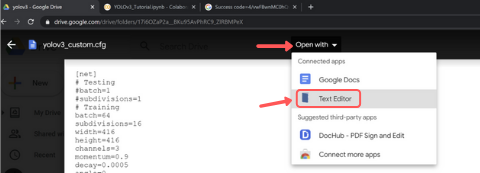

I recommend having **batch = 64** and **subdivisions = 16** for ultimate results. If you run into any issues then up subdivisions to 32.

Make the rest of the changes to the cfg based on how many classes you are training your detector on.<br>
**Formulae:**<h3>
1. max_batches = no.of classes X 1000
2. steps = 80% of max_batches, 90% of max_batches
3. filters = (no.of classes + 5) X 3</h3>

**Note:** according to set my **max_batches = 2000**, **steps = 1600, 1800**, I changed the **classes = 1** in the three YOLO layers and **filters = 18** in the three convolutional layers before the YOLO layers. 

**Optional:** In each of the three yolo layers in the cfg, change one line from random = 1 to **random = 0** to speed up training but slightly reduce accuracy of model. Will also help save memory if you run into any memory issues.


In [0]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3/yolov3_custom1.cfg ./cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd .. 

In [58]:
ls /mydrive/yolov3

backup/            obj.data   yolov3_custom1.cfg
generate_train.py  obj.names  yolov3_dataset.rar


In [0]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data ./data

# upload the obj.names and obj.data files to cloud VM from local machine (uncomment to use)
#%cd data
#upload()
#%cd .. 

## iii) Generating train.txt
The last configuration file needed before we can begin to train our custom detector is the train.txt file which hold the relative paths to all our training images.

The script to generate train.txt can be taken from this repo [Github Repo](https://github.com/theAIGuysCode/YoloGenerateTrainingFile/blob/master/generate_train.py/)

Just download the file to your local machine or Google drive so we can upload it to your cloud VM.

In [0]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/yolov3/generate_train.py ./

# upload the generate_train.py script to cloud VM from local machine (uncomment to use)
#upload()


In [61]:
!pwd

/content/darknet


Now we simply run the python script to do all the work for us.

In [0]:
!python generate_train.py

In [63]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


# Step 4: Download pre-trained weights for the convolutional layers.
This step downloads the weights for the convolutional layers of the YOLOv3 network. By using these weights it helps your custom object detector to be way more accurate and not have to train as long. You don't have to use these weights but trust me it will help your modle converge and be accurate way faster. USE IT!

In [64]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2020-04-06 04:08:54--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   772KB/s    in 3m 24s  

2020-04-06 04:12:20 (777 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# Step 5: Train Your Custom Object Detector!
The time has finally come! You have made it to the moment of truth! You are now ready to train your custom YOLOv3 object detector on whatever crazy classes you have decided on. So run the following command. (dont_show flag stops a chart from popping up since cloud can't open images on the spot)
```
!./darknet detector train <path to obj.data> <path to custom config> darknet53.conv.74 -dont_show
```
**TIP:** This training could take several hours depending on how many iterations you chose in the .cfg file. You will want to let this run as you sleep or go to work for the day, etc. However, Colab Cloud Service kicks you off it's VMs if you are idle for too long (30-90 mins).

To avoid this hold (CTRL + SHIFT + i) at the same time to open up the inspector view on your browser.

Paste the following code into your console window and hit **Enter**
```
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)
```
Looks like this, it will click the screen every 10 minutes so that you don't get kicked off for being idle! HACKS!

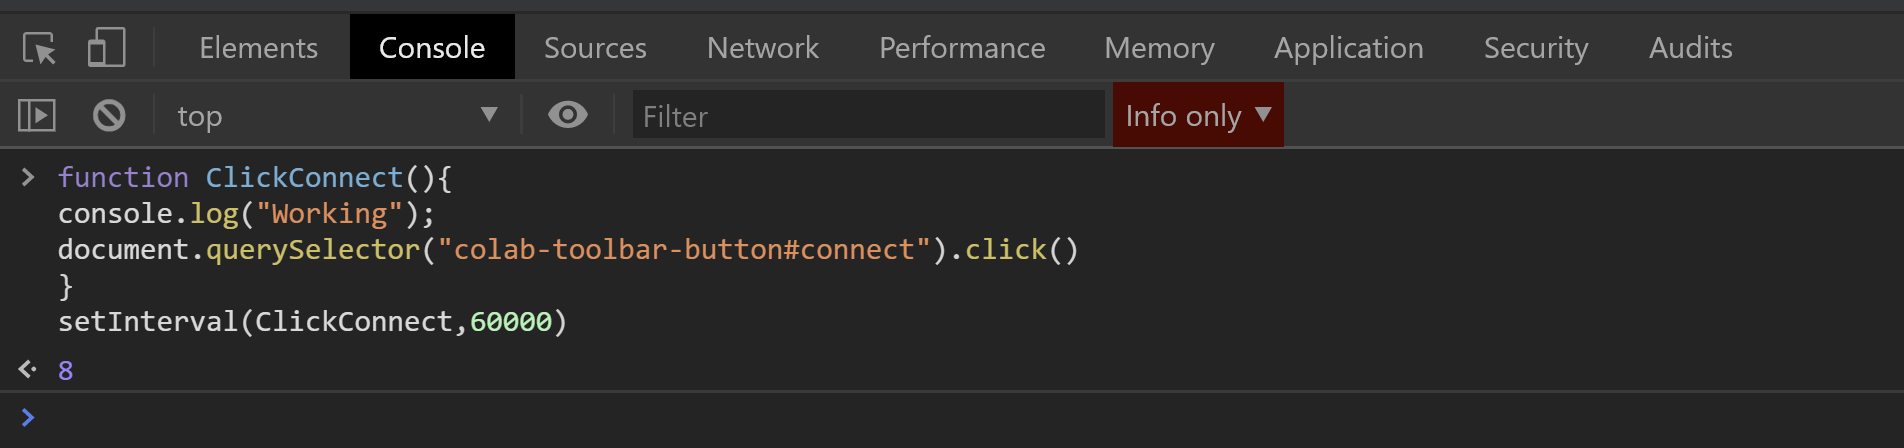

In [0]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom1.cfg darknet53.conv.74 -dont_show

You can observe a chart of how your model did throughout the training process by running the below command. It shows a chart of your average loss vs. iterations. For your model to be 'accurate' you would aim for a loss under 2.

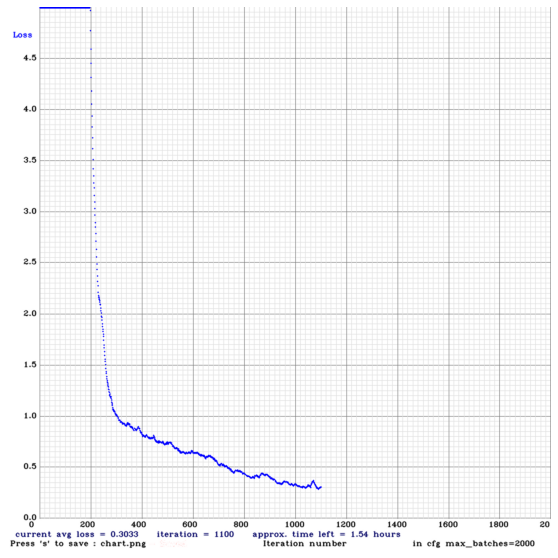

In [76]:
imShow('chart_yolov3_custom1.png')

**Using Backup files**: If for some reason you get an error or your Colab goes idle during training, you have not lost your weights! Every 100 iterations a weights file called **yolov3_custom_last.weights** is saved to **mydrive/yolov3/backup/** folder (wherever your backup folder is). 


In [65]:
!./darknet detector train data/obj.data cfg/yolov3_custom1.cfg /mydrive/yolov3/backup/yolov3_custom1_last.weights -dont_show

 CUDA-version: 10000 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3_custom
Couldn't open file: cfg/yolov3_custom.cfg


# Step 6: Run Your Custom Object Detector!!!
You have done it! You now have a custom object detector to make your very own detections. Time to test it out and have some fun!

In [77]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom1.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom1.cfg
%cd ..


/content/darknet/cfg
/content/darknet


 CUDA-version: 10000 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 750, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64 

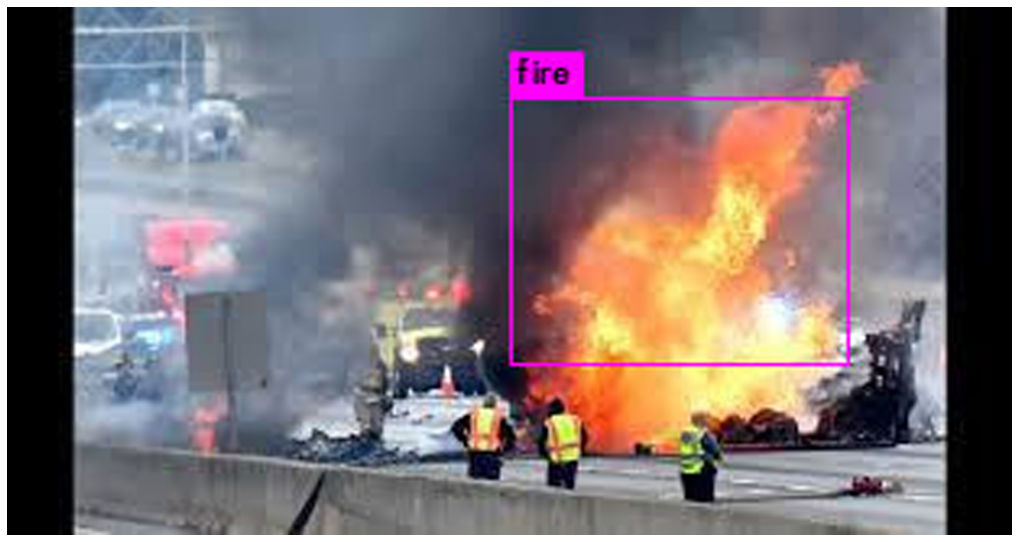

In [88]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom1.cfg /mydrive/yolov3/backup/yolov3_custom1_last.weights /mydrive/yolov3/images/fire10.jpg -thresh 0.3
imShow('predictions.jpg')